## 2.1 分析csv文件

Missing data for 2018-02-18 00:00:00


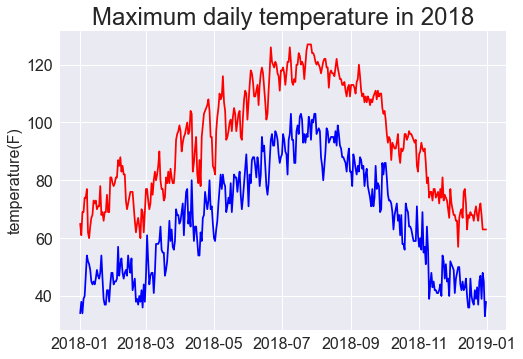

In [17]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

filename = 'death_valley_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)      #创建与文件关联的阅读器对象，可想象成列表的排列
    header_row = next(reader)     #返回文件的下一行，这里就是文件头
    """     
    python的注释也要与程序段对齐
    for index, value in enumerate(header_row):     #获取每个元素的索引及值
        print(index, value)
    """
    #从文件中获取日期和最高温度  记得缩进，这要在with open里面
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')    #字符串转换成日期
        try:
            high = int(row[4]) #字符串转int
            low = int(row[5])
        except ValueError:      #因为会有数据缺失的情况
            print(f"Missing data for {current_date}")
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)


#根据最高温度和最低温度绘制图形
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red')
ax.plot(dates, lows, c='blue')


#设置图形的格式
ax.set_title("Maximum daily temperature in 2018", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate    #绘制倾斜的日期标签，避免重复，fig好像第一次使用
ax.set_ylabel('temperature(F)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)   #设置刻度标签的大小

plt.show()


## 2.2 分析json格式